In [22]:

import os, random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical

In [23]:
%cd '/content/drive/MyDrive/BTP/Fashion2'

[Errno 2] No such file or directory: '/content/drive/MyDrive/BTP/Fashion2'
/content


In [24]:
def load_and_preprocess_data(debug=False):
    
    from tensorflow.keras.datasets.fashion_mnist import load_data
   

# Step-1: load the raw dataset
    (X_train, y_train), (X_test, y_test) = load_data()

    indexes = np.arange(X_train.shape[0])
    for _ in range(5): indexes = np.random.permutation(indexes)  # shuffle 5 times!
    X_train = X_train[indexes]
    y_train = y_train[indexes]
    X_train1=X_train.copy()
    y_train1=y_train.copy()
      #Train - 80%
      #Valid - 20% 
    val_count = 48000
    X_train=X_train1[:val_count]
    y_train=y_train1[:val_count]
    X_val = X_train1[val_count:]
    y_val = y_train1[val_count:]
    
# Step-3: scale the images
    # scale the images to between 0-1
    X_train = X_train.astype('float32') / 255.0
    X_val = X_val.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

# Step-4: reshape the images into 3D tensors so our CNN can consume it
    # reshape the image arrays (make 2D arrays instead of 3D arrays)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
    y_train=to_categorical(y_train)
    y_val=to_categorical(y_val)
    y_test=to_categorical(y_test)

   

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [25]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_and_preprocess_data()

In [28]:
len(y_test[0])

10

In [29]:
import tensorflow.keras.backend as K
import keras
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 28, 28, 1, 10

def build_model():
    
        # Model
    model = Sequential()
    # Add convolution 2D
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    kernel_initializer='he_normal',
                    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1)))
    model.add(MaxPooling2D((2, 2)))
    # Add dropouts to the model
    model.add(Dropout(0.25))
    model.add(Conv2D(64, 
                    kernel_size=(3, 3), 
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Add dropouts to the model
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Add dropouts to the model
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    # Add dropouts to the model
    model.add(Dropout(0.3))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    adam=Adam(lr=0.001,decay=1e-5)


    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

   
        
    return model

In [30]:
model = build_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 64)         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
trained_model=model.fit(X_train, y_train, epochs=30,
        batch_size=128, validation_data=(X_val, y_val),verbose=1)

Epoch 1/30
375/375 [==============================] - 53s 139ms/step - loss: 0.7744 - accuracy: 0.7106 - val_loss: 0.4863 - val_accuracy: 0.8221
Epoch 2/30
375/375 [==============================] - 52s 140ms/step - loss: 0.4936 - accuracy: 0.8131 - val_loss: 0.3913 - val_accuracy: 0.8567
Epoch 3/30
375/375 [==============================] - 64s 170ms/step - loss: 0.4215 - accuracy: 0.8455 - val_loss: 0.3305 - val_accuracy: 0.8771
Epoch 4/30
375/375 [==============================] - 59s 158ms/step - loss: 0.3764 - accuracy: 0.8620 - val_loss: 0.3005 - val_accuracy: 0.8875
Epoch 5/30
375/375 [==============================] - 70s 188ms/step - loss: 0.3533 - accuracy: 0.8704 - val_loss: 0.2922 - val_accuracy: 0.8928
Epoch 6/30
375/375 [==============================] - 52s 138ms/step - loss: 0.3278 - accuracy: 0.8809 - val_loss: 0.2746 - val_accuracy: 0.8992
Epoch 7/30
375/375 [==============================] - 56s 148ms/step - loss: 0.3163 - accuracy: 0.8833 - val_loss: 0.2666 - val_ac

In [58]:
model.save('/content/drive/MyDrive/BTP/Fashion2/f2.h5')

In [57]:
model.save('/content/f2.h5')

In [33]:
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2323 - accuracy: 0.9160


In [34]:
y=model.predict(X_test)
np.argmax(y[-2])

1

In [35]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
# load the image
#Correct
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
filename='/content/pull.png'
img = load_img(filename, grayscale=True, target_size=(28, 28))

# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0
y11=model.predict(img)
print(y11)
np.argmax(y11)

[[6.0534417e-06 5.1977245e-14 9.9974293e-01 5.0300120e-10 5.9209928e-05
  1.1504349e-13 1.9164434e-04 4.5082746e-16 7.5332991e-08 1.9198249e-14]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


2

In [37]:
def show_history(model):
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

In [38]:
def show_history1(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

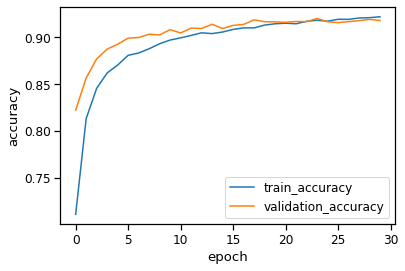

In [39]:
show_history(trained_model)

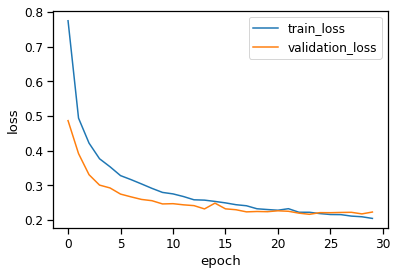

In [40]:
show_history1(trained_model)